## Daniel Barella
## 11/19/25

# 🧠 Day 39 — Convolutional Neural Networks (CNNs)

Welcome to **Day 39** of your ML → AI transition!  
Today you enter the world of **Computer Vision** using **Convolutional Neural Networks (CNNs)** — the backbone of modern image classification.

---

# ⭐ Learning Objectives
By the end of today, you will be able to:

- Understand what **convolutions** and **filters** do  
- Explain **feature maps**, **stride**, and **padding**  
- Use **pooling layers** to downsample images  
- Build a CNN using **TensorFlow/Keras**  
- Train and evaluate a CNN on a real dataset  
- Visualize filters, feature maps, and learning curves  

---


# 📦 1. Imports & Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


# 🧵 2. Load Fashion-MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# 👁 3. Visualize Sample Images

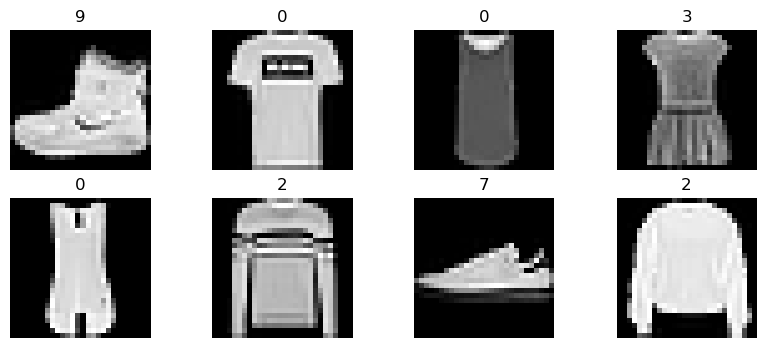

In [3]:
plt.figure(figsize=(10,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()


# 🧩 4. Build Your First CNN

In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    
    Dense(10, activation='softmax')
])

model.summary()


/Users/danielbarella/miniconda3/envs/dojo-env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# ⚙️ 5. Compile the Model

In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# 🚀 6. Train the CNN

In [6]:
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.7261 - loss: 0.7699 - val_accuracy: 0.8650 - val_loss: 0.3612
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.8666 - loss: 0.3676 - val_accuracy: 0.8827 - val_loss: 0.3124
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.8839 - loss: 0.3165 - val_accuracy: 0.8967 - val_loss: 0.2811
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.8967 - loss: 0.2835 - val_accuracy: 0.9043 - val_loss: 0.2616
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9026 - loss: 0.2621 - val_accuracy: 0.9063 - val_loss: 0.2507
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9118 - loss: 0.2377 - val_accuracy: 0.9122 - val_loss: 0.2461
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9194 - loss: 0.2187 - val_accuracy: 0.9132 - val_loss: 0.2362
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9265 - loss: 0.1993 - 

# 📈 7. Plot Accuracy & Loss

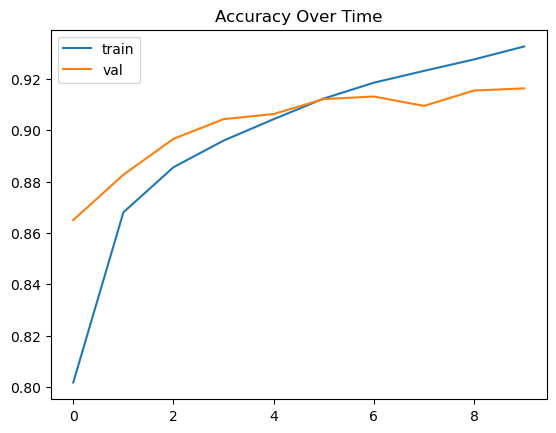

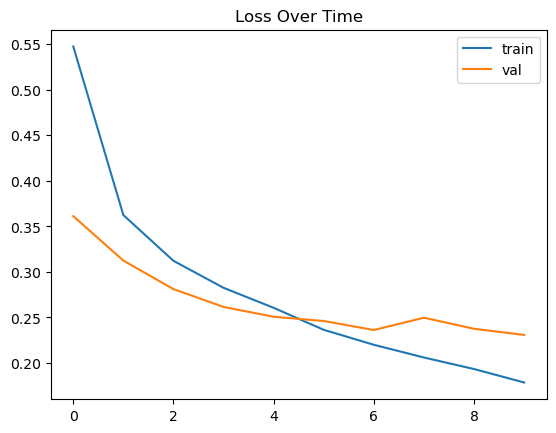

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Over Time')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Over Time')
plt.legend(['train', 'val'])
plt.show()


# 🧪 8. Evaluate on Test Set

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9106 - loss: 0.2512
Test Accuracy: 0.9111999869346619


# 🔍 9. Predict & Visualize Errors

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


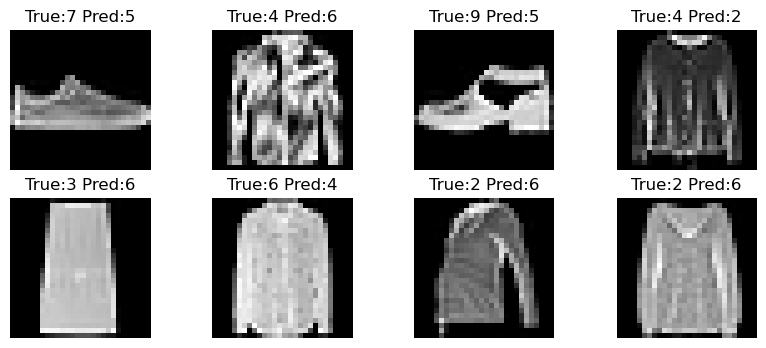

In [9]:
preds = model.predict(X_test)
pred_labels = preds.argmax(axis=1)

wrong = np.where(pred_labels != y_test)[0]

plt.figure(figsize=(10,4))
for i, idx in enumerate(wrong[:8]):
    plt.subplot(2,4,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True:{y_test[idx]} Pred:{pred_labels[idx]}")
    plt.axis('off')
plt.show()


# 💡 10. Mini-Project: Build a Better CNN

## Goal: Improve accuracy by 5–10%

Try at least 3 modifications:

### 🔧 Option A — Increase Filters

In [10]:
Conv2D(64, (3,3), activation='relu')


<Conv2D name=conv2d_2, built=False>

### 🧱 Option B — Add Another Conv Block

In [11]:
Conv2D(128, (3,3), activation='relu')
MaxPooling2D((2,2))


<MaxPooling2D name=max_pooling2d_2, built=True>

### 🛡 Option C — Add Regularization

In [12]:
Dropout(0.5)


<Dropout name=dropout_1, built=True>

### 🌪 Option D — Add Data Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


### Train again using:

In [14]:
history = model.fit(datagen.flow(X_train, y_train_cat, batch_size=64),
                    epochs=15,
                    validation_data=(X_test, y_test_cat))


Epoch 1/15


/Users/danielbarella/miniconda3/envs/dojo-env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.8168 - loss: 0.4927 - val_accuracy: 0.9007 - val_loss: 0.2717
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8530 - loss: 0.3946 - val_accuracy: 0.9053 - val_loss: 0.2661
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8640 - loss: 0.3719 - val_accuracy: 0.9029 - val_loss: 0.2673
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.8692 - loss: 0.3514 - val_accuracy: 0.8978 - val_loss: 0.2835
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.8741 - loss: 0.3399 - val_accuracy: 0.8960 - val_loss: 0.2885
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8744 - loss: 0.3370 - val_accuracy: 0.9063 - val_loss: 0.2582
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.8800 - loss: 0.3285 - val_accuracy: 0.9047 - val_loss: 0.2679
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8823 - loss: 0.3123 - val_accurac

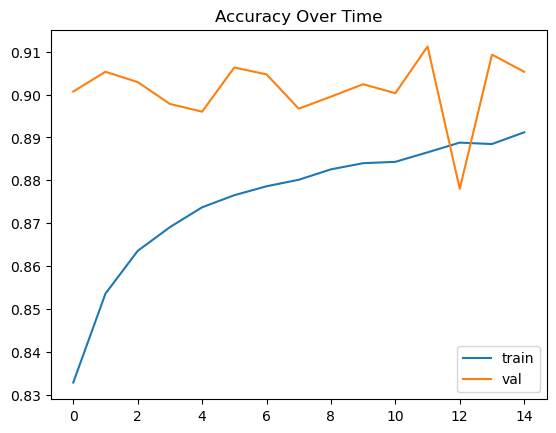

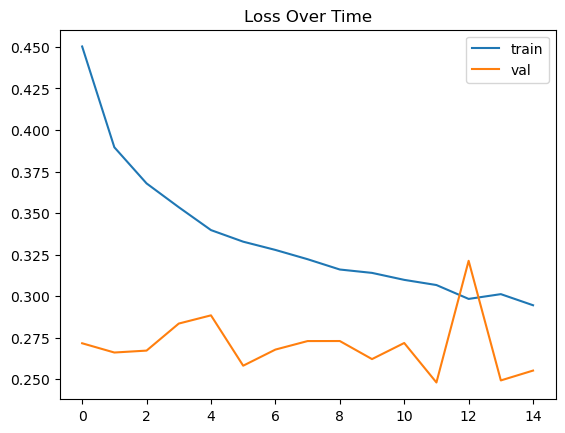

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Over Time')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Over Time')
plt.legend(['train', 'val'])
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9011 - loss: 0.2620
Test Accuracy: 0.9053000211715698


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


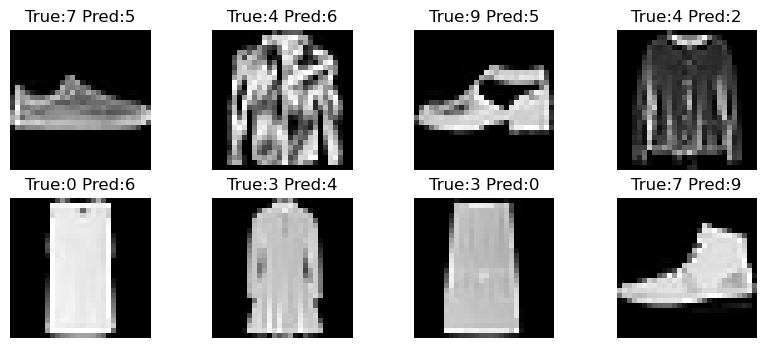

In [17]:
preds = model.predict(X_test)
pred_labels = preds.argmax(axis=1)

wrong = np.where(pred_labels != y_test)[0]

plt.figure(figsize=(10,4))
for i, idx in enumerate(wrong[:8]):
    plt.subplot(2,4,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True:{y_test[idx]} Pred:{pred_labels[idx]}")
    plt.axis('off')
plt.show()
